In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils import w_data


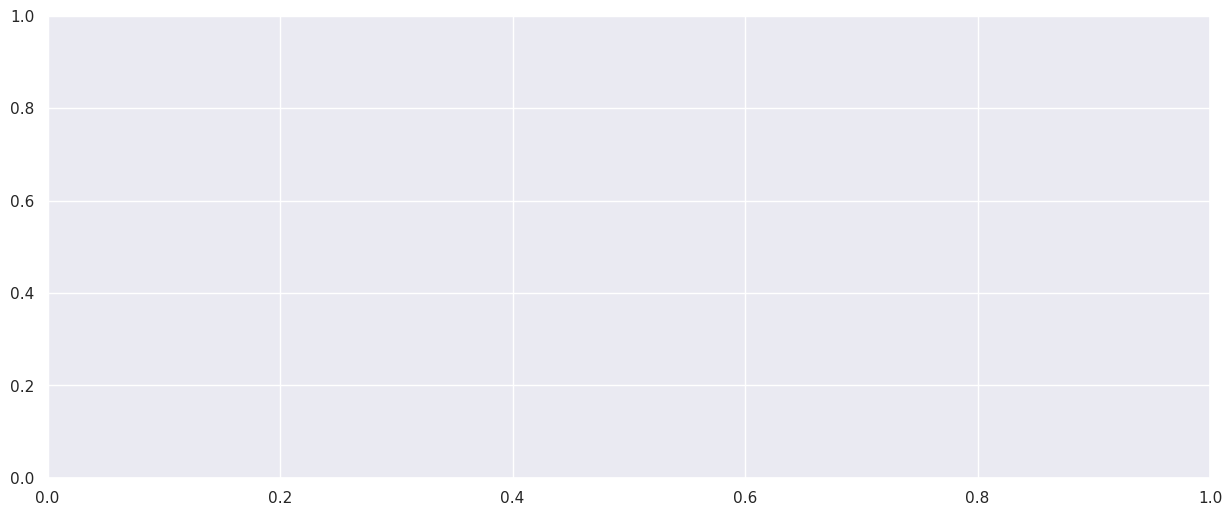

In [42]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(15,6))

In [43]:
df = pd.read_csv(w_data)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-05-02,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-05-02,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-05-02,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-05-02,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


### EDA Q's: 
* Weekly sales across time?
* Weekly sales across store type over time?
* Weekly sales and holiday across time?
* Price over time
* Temperature Over time

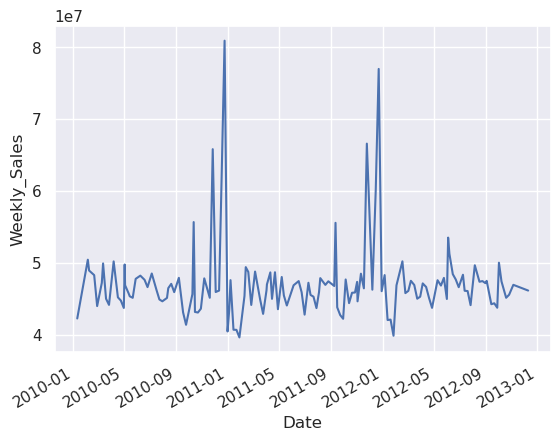

In [44]:
sns.lineplot(data=df.groupby("Date").agg({"Weekly_Sales":"sum"}).reset_index(), 
             x="Date", y = "Weekly_Sales").get_figure().autofmt_xdate()

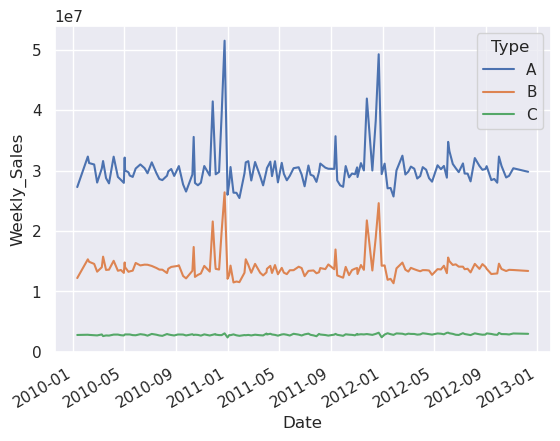

In [60]:
sns.lineplot(data=df.groupby(["Date", "Type"]).agg({"Weekly_Sales":"sum"}).reset_index(),
            x="Date", y = "Weekly_Sales", hue="Type").get_figure().autofmt_xdate()

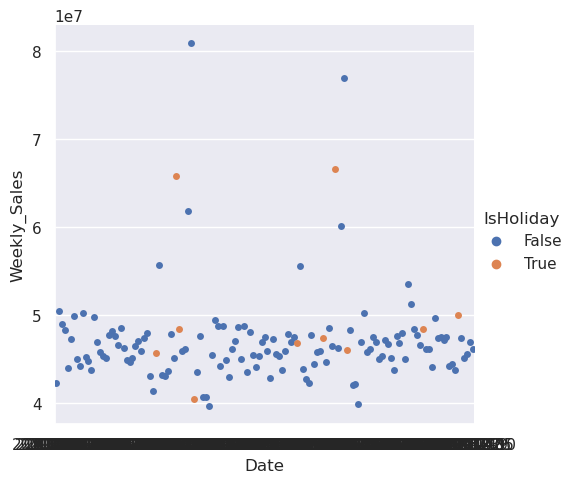

In [73]:
sns.catplot(data=df.groupby(["Date", "IsHoliday"]).agg({"Weekly_Sales":"sum"}).reset_index(),
            x="Date", y = "Weekly_Sales", hue="IsHoliday")

<AxesSubplot: xlabel='Date', ylabel='Fuel_Price'>

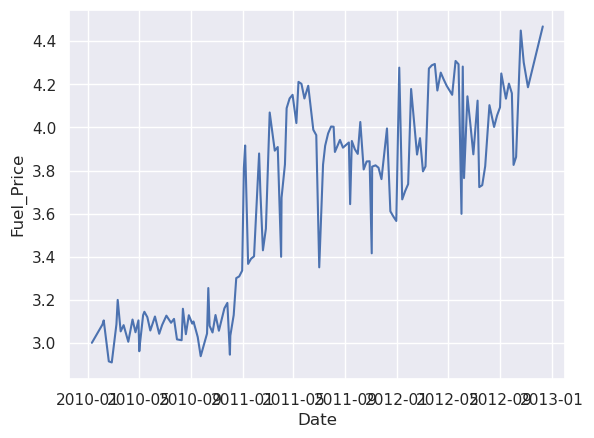

In [67]:
sns.lineplot(data=df.groupby(["Date"]).agg({"Fuel_Price":"max"}).reset_index(),
            x="Date", y = "Fuel_Price")

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Fuel_Price'>

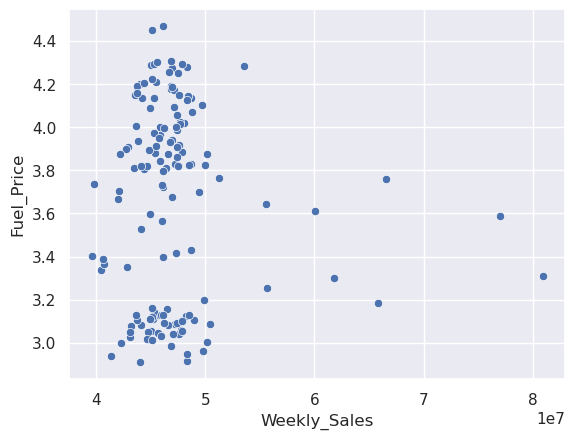

In [72]:
sns.scatterplot(x = "Weekly_Sales",y = "Fuel_Price", 
data = df.groupby("Date").agg({"Weekly_Sales":"sum", "Fuel_Price":"max"}).reset_index())